<a href="https://colab.research.google.com/github/APARNA2205/Log_Reg/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **LOGISTIC REGRESSION**

Steps to follow for Logistic Regression

1. Import the required libraries
2. Read and understand the data
3. Exploratory Data Analysis
4. Data Preparation
5. Building Logistic Regression Model
6. Making Predictions on Test Set
7. Assigning Scores as per predicted probability values


### **IMPORTING NECESSARY LIBRARIES**

In [124]:
# Lets import all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

sns.set()

### **LOADING OF THE DATA**

In [125]:
df=pd.read_csv("/content/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


* The dataset has 768 rows and 9  columns
* Pregnancies: To express the Number of pregnancies
* Glucose: To express the Glucose level in blood
* BloodPressure: To express the Blood pressure measurement
* SkinThickness: To express the thickness of the skin
* Insulin: To express the Insulin level in blood
* BMI: To express the Body mass index
* DiabetesPedigreeFunction: To express the Diabetes percentage
* Age: To express the age
* Outcome: To express the final result 1 is Yes and 0 is No

### **STATISTICAL SUMMARY**

In [126]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* The columns BMI and DiabetesPedigreeFunction are float data type
* Remaining 7  columns are of integer data type
* The memory usage is about 54.1 KB


### **LOOKING FOR ALL COLUMNS IN DATA TEST**

In [128]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### **CHECKING FOR NULL VALUES**

In [129]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [130]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values in the data set

### **CONSTUCTING HEATMAP FOR THE DATA**

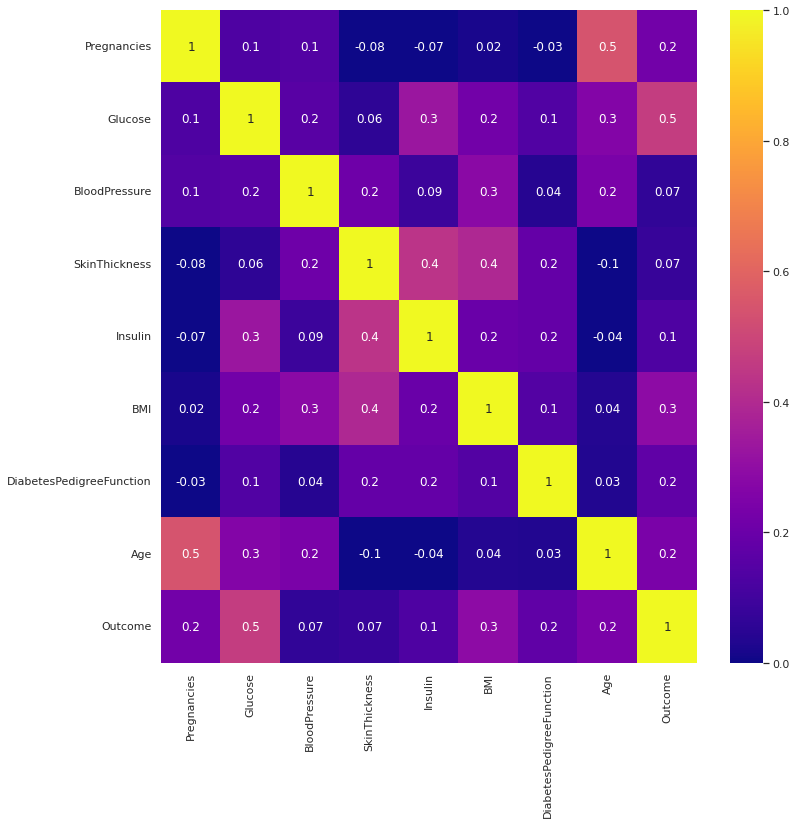

In [131]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(), annot=True, fmt='.1g', vmin=0, vmax=1, cmap='plasma')

* Very less correlations have a strong value for relation. 
* Almost all relations are positive, let's look at some of the most strongest correlations.

### **DATA VISUALIZATION**

In [103]:
fig = px.scatter(data_frame=df, y='Pregnancies', x='Age', color='Outcome', title="Age vs Pregnancies")
fig.update_layout({'title':{'x':0.5}})
fig.show()

* This makes sense that Number of Pregnancies increases with the increase in Age.  
* However, there is no clear separation between the target classes but it can be spotted that with increasing age and number of pregnancies the risk of diabetes increases.

In [104]:
fig= px.box(data_frame=df, x='Glucose', color='Outcome', title="Glucose vs Outcome", points='all')
fig.update_layout({'title':{'x':0.5}})
fig.show()

* The distribution for 'Yes' class is more shifted towards the right and have a flat peak, whereas the 'No' class distribution has a high peak and is shifted towards the middle with respect to the glucose values. 
* This shows that if you have high glucose, it could possibly result in Diabetes.

In [105]:
fig = px.scatter(data_frame=df, y='Insulin', x='SkinThickness', title="Insulin vs Skin Thickness", color='Outcome', trendline='ols')
fig.update_layout({'title':{'x':0.5}})
fig.show()

### **PLOTTING THE DATA OF EVERY COLUMN ON DISTPLOT**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/di

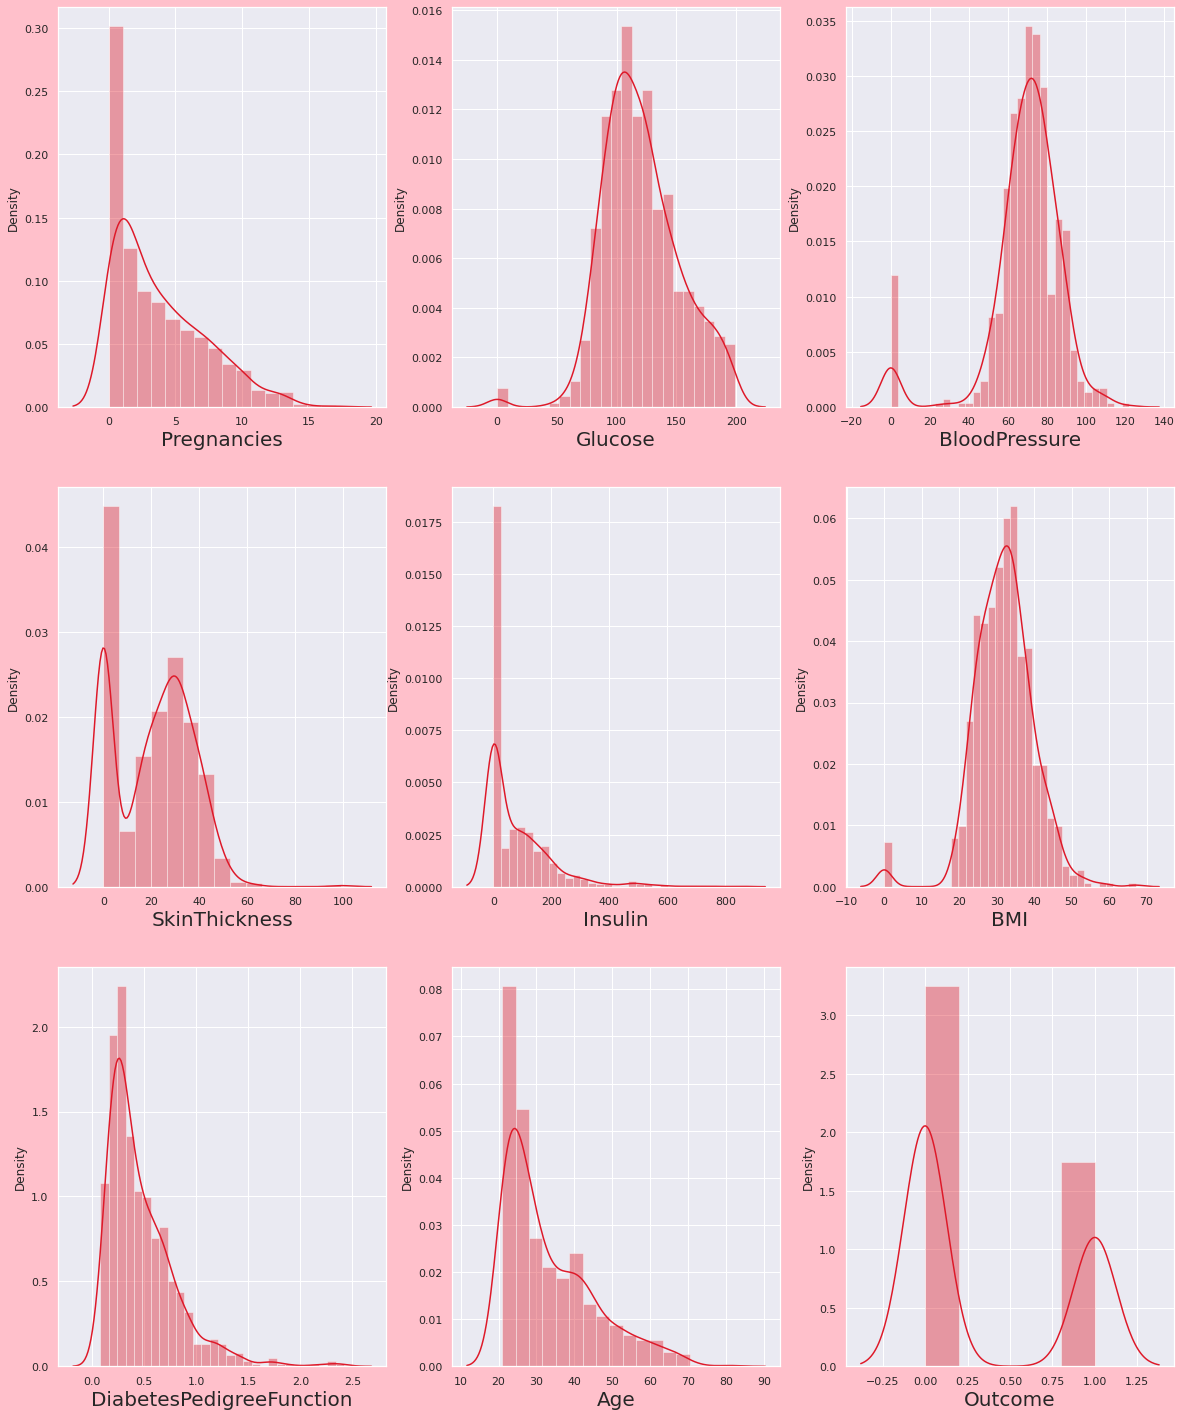

In [132]:
# Lets see how the data is distributed for every column

plt.figure(figsize=(20,25),facecolor="pink")
plotnumber=1

for column in df:
  if plotnumber<=9:  # There are 9 columns in the dataset
    ax=plt.subplot(3,3,plotnumber)
    sns.distplot(df[column],color="#DE1929")
    plt.xlabel(column,fontsize=20)
    #plt.ylabel("Salary",fontsize=20)
  plotnumber+=1
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



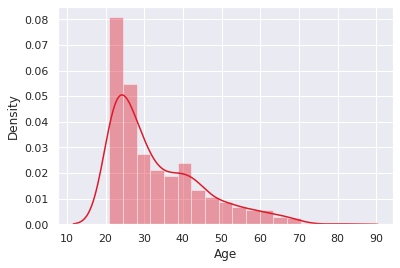

In [133]:
sns.distplot(df["Age"],color="#DE1929")

* We can see there is some skewness in the data
* Also we can see there are few data for columns Glucose,Insulin,SkinThickness,BMI,BloodPressure which have values as 0.
* Thats not possible we can do a quick search to see that one cannot have 0 values for these.
* We can either remove such data or simply replace it with their respective mean value 

In [134]:
# replacing zero values with the mean of the column

df["BMI"]=df["BMI"].replace(0,df["BMI"].mean())
df["Glucose"]=df["Glucose"].replace(0,df["Glucose"].mean())
df["SkinThickness"]=df["SkinThickness"].replace(0,df["SkinThickness"].mean())
df["BloodPressure"]=df["BloodPressure"].replace(0,df["BloodPressure"].mean())
df["Insulin"]=df["Insulin"].replace(0,df["Insulin"].mean())



### **PLOTING THE DATA OF EVERY COLUMN USING BOX PLOT**

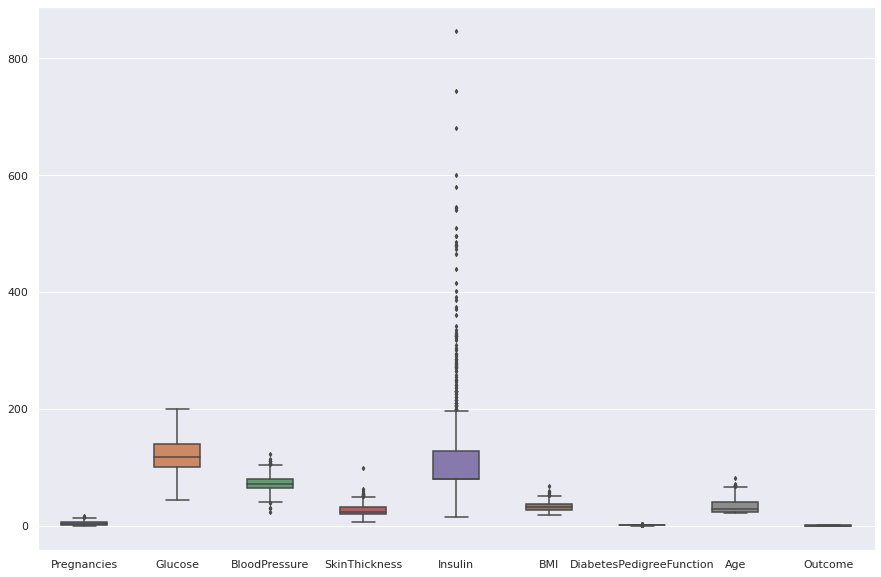

In [135]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df,width=0.5,ax=ax,fliersize=3)

In [136]:
df["Pregnancies"].shape

(768,)

In [137]:
df["Pregnancies"].quantile(0.98)

12.0

In [138]:
q=df["Pregnancies"].quantile(0.98)

# we are removing the top 2% data from the Pregnancies column
data_cleaned= df[df["Pregnancies"]<q]
data_cleaned


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [139]:
df["BMI"].shape

(768,)

In [140]:
df["BMI"].quantile(0.99)

50.75900000000009

In [141]:
q=data_cleaned["BMI"].quantile(0.99)

# we are removing the top 1% of data from the BMI column
data_cleaned=data_cleaned[data_cleaned["BMI"]<q] 
data_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


### **CLEANING THE DATA**

In [142]:
q = df["Pregnancies"].quantile(0.98)
# we are removing the top 2% of data from the Pregnancies column
data_cleaned = df[df["Pregnancies"]<q]

q = data_cleaned["BMI"].quantile(0.99)
# we are removing the top 1% of data from the BMI column
data_cleaned = data_cleaned[data_cleaned["BMI"]<q]

q = data_cleaned["SkinThickness"].quantile(0.99)
# we are removing the top 1% of data from the SkinThickness  column
data_cleaned = data_cleaned[data_cleaned["SkinThickness"]<q]

q = data_cleaned["Insulin"].quantile(0.95)
# we are removing the top 5% of data from the Insulin column
data_cleaned = data_cleaned[data_cleaned["Insulin"]<q]

q = data_cleaned["DiabetesPedigreeFunction"].quantile(0.99)
# we are removing the top 1% of data from the DiabetesPedigreeFunction  column
data_cleaned = data_cleaned[data_cleaned["DiabetesPedigreeFunction"]<q]

q = data_cleaned["Age"].quantile(0.99)
# we are removing the top 1% of data from the Age column
data_cleaned = data_cleaned[data_cleaned["Age"]<q]



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/di

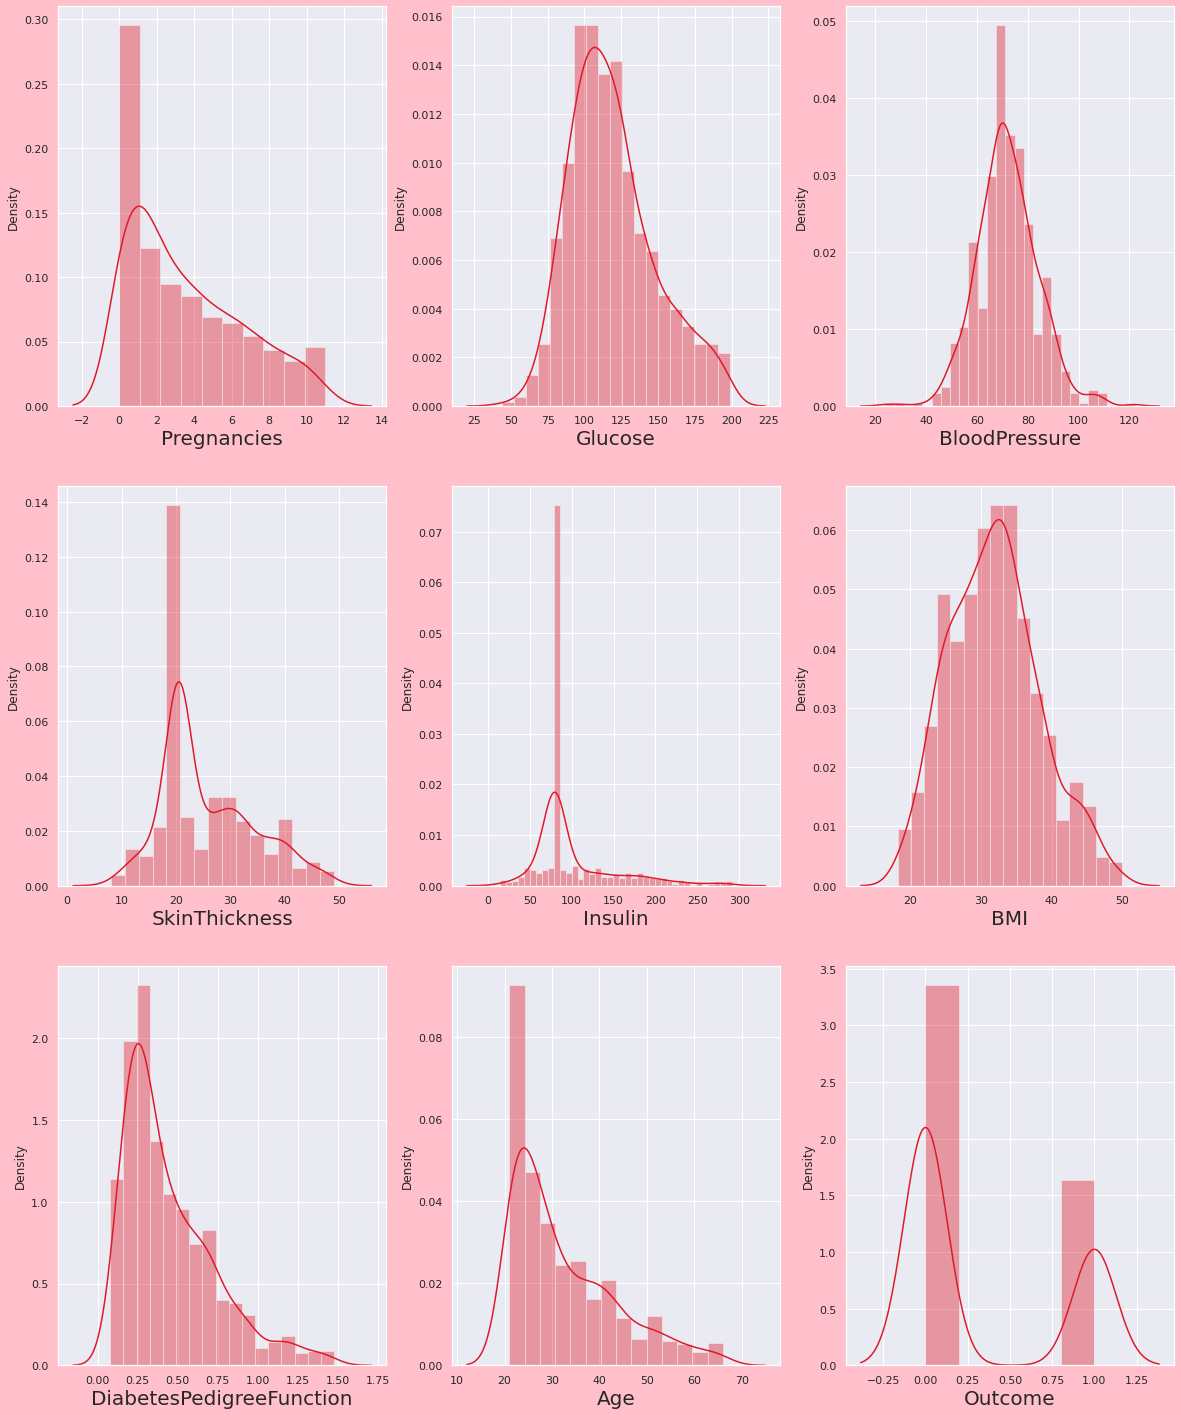

In [143]:
# Lets see how the data is distributed for every column

plt.figure(figsize=(20,25),facecolor="pink")
plotnumber=1

for column in data_cleaned:
  if plotnumber<=9:  # There are 9 columns in the dataset
    ax=plt.subplot(3,3,plotnumber)
    sns.distplot(data_cleaned[column],color="#DE1929")
    plt.xlabel(column,fontsize=20)
    #plt.ylabel("Salary",fontsize=20)
  plotnumber+=1
plt.show()

* The data looks much better now than before we still start our analysis with this data now as we don't want to loose important information.
* If our model doesnot work with accuracy we will come back for more preprocessing

In [144]:
x = df.drop(columns = ["Outcome"])
y = df["Outcome"]

* Before we fit our data to model let's visualize the reationship between our independent variables and the categories.

In [145]:
df.shape

(768, 9)

In [146]:
data_cleaned.shape

(674, 9)

### **PLOTING THE DATA ON DIST PLOT FOR CLEANED DATA**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/di

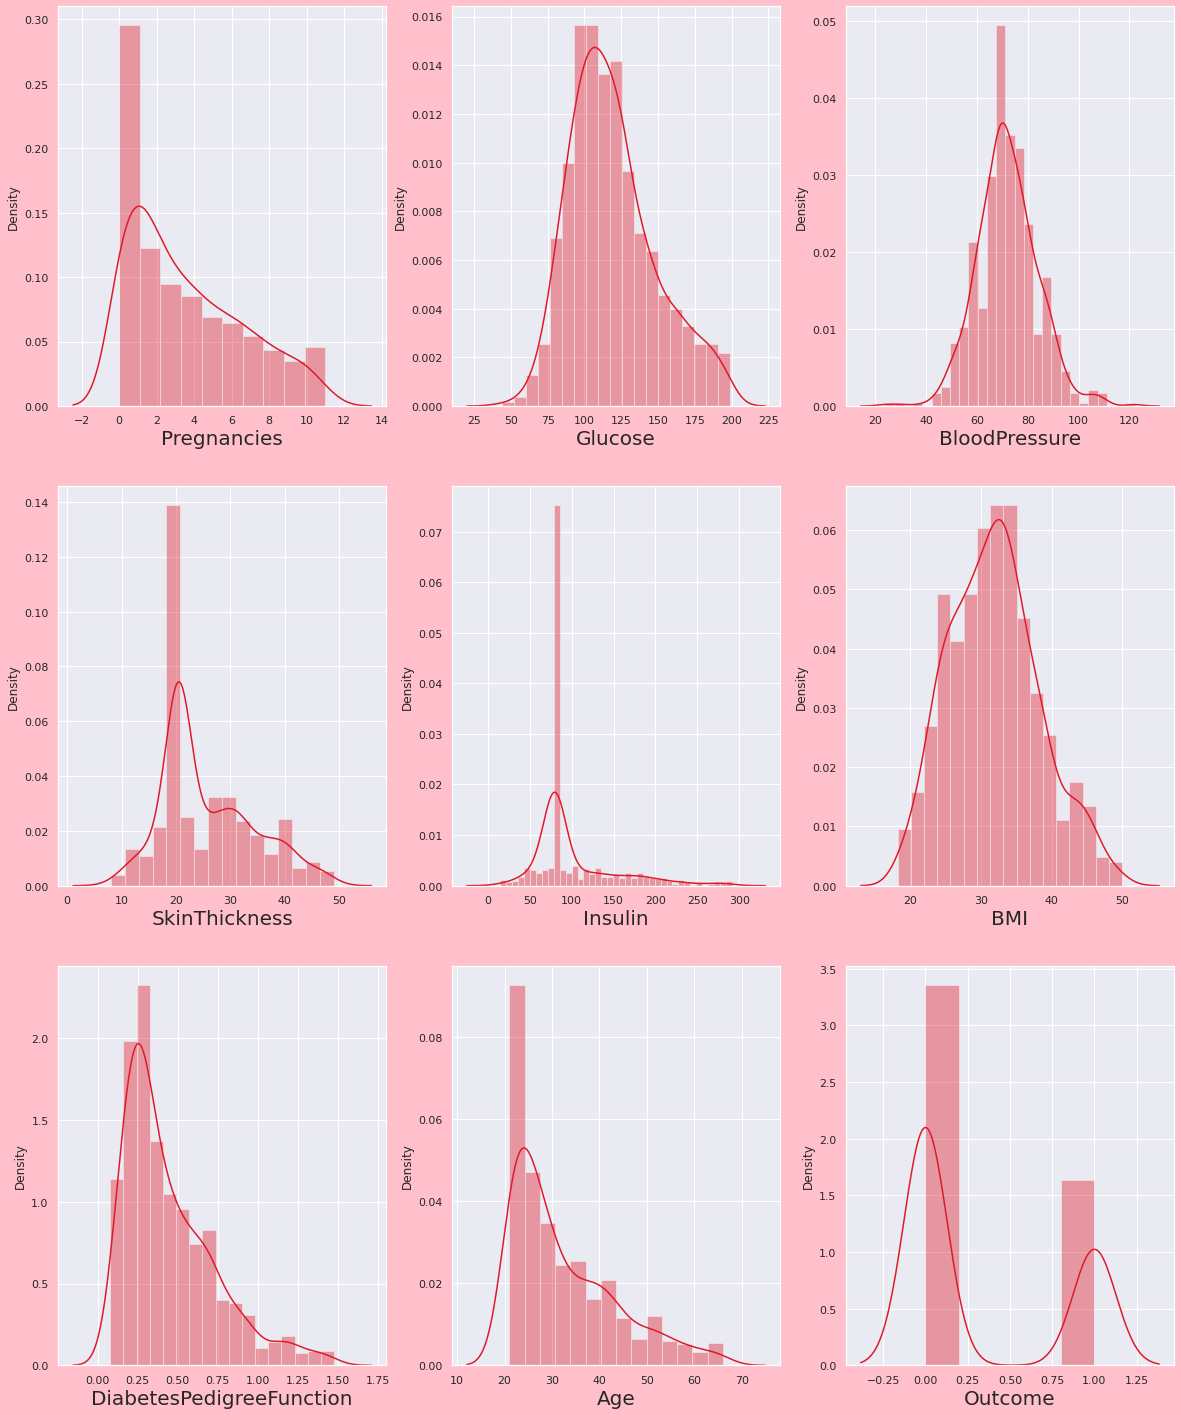

In [147]:
# Lets see how the data is distributed for every column

plt.figure(figsize=(20,25),facecolor="pink")
plotnumber=1

for column in data_cleaned:
  if plotnumber<=9:  # There are 9 columns in the dataset
    ax=plt.subplot(3,3,plotnumber)
    sns.distplot(data_cleaned[column],color="#DE1929")
    plt.xlabel(column,fontsize=20)
    #plt.ylabel("Salary",fontsize=20)
  plotnumber+=1
plt.show()

* The data looks much better now than before we still start our analysis with this data now as we don't want to loose important information.
* If our model doesnot work with accuracy we will come back for more preprocessing

### **STRIP PLOT**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning

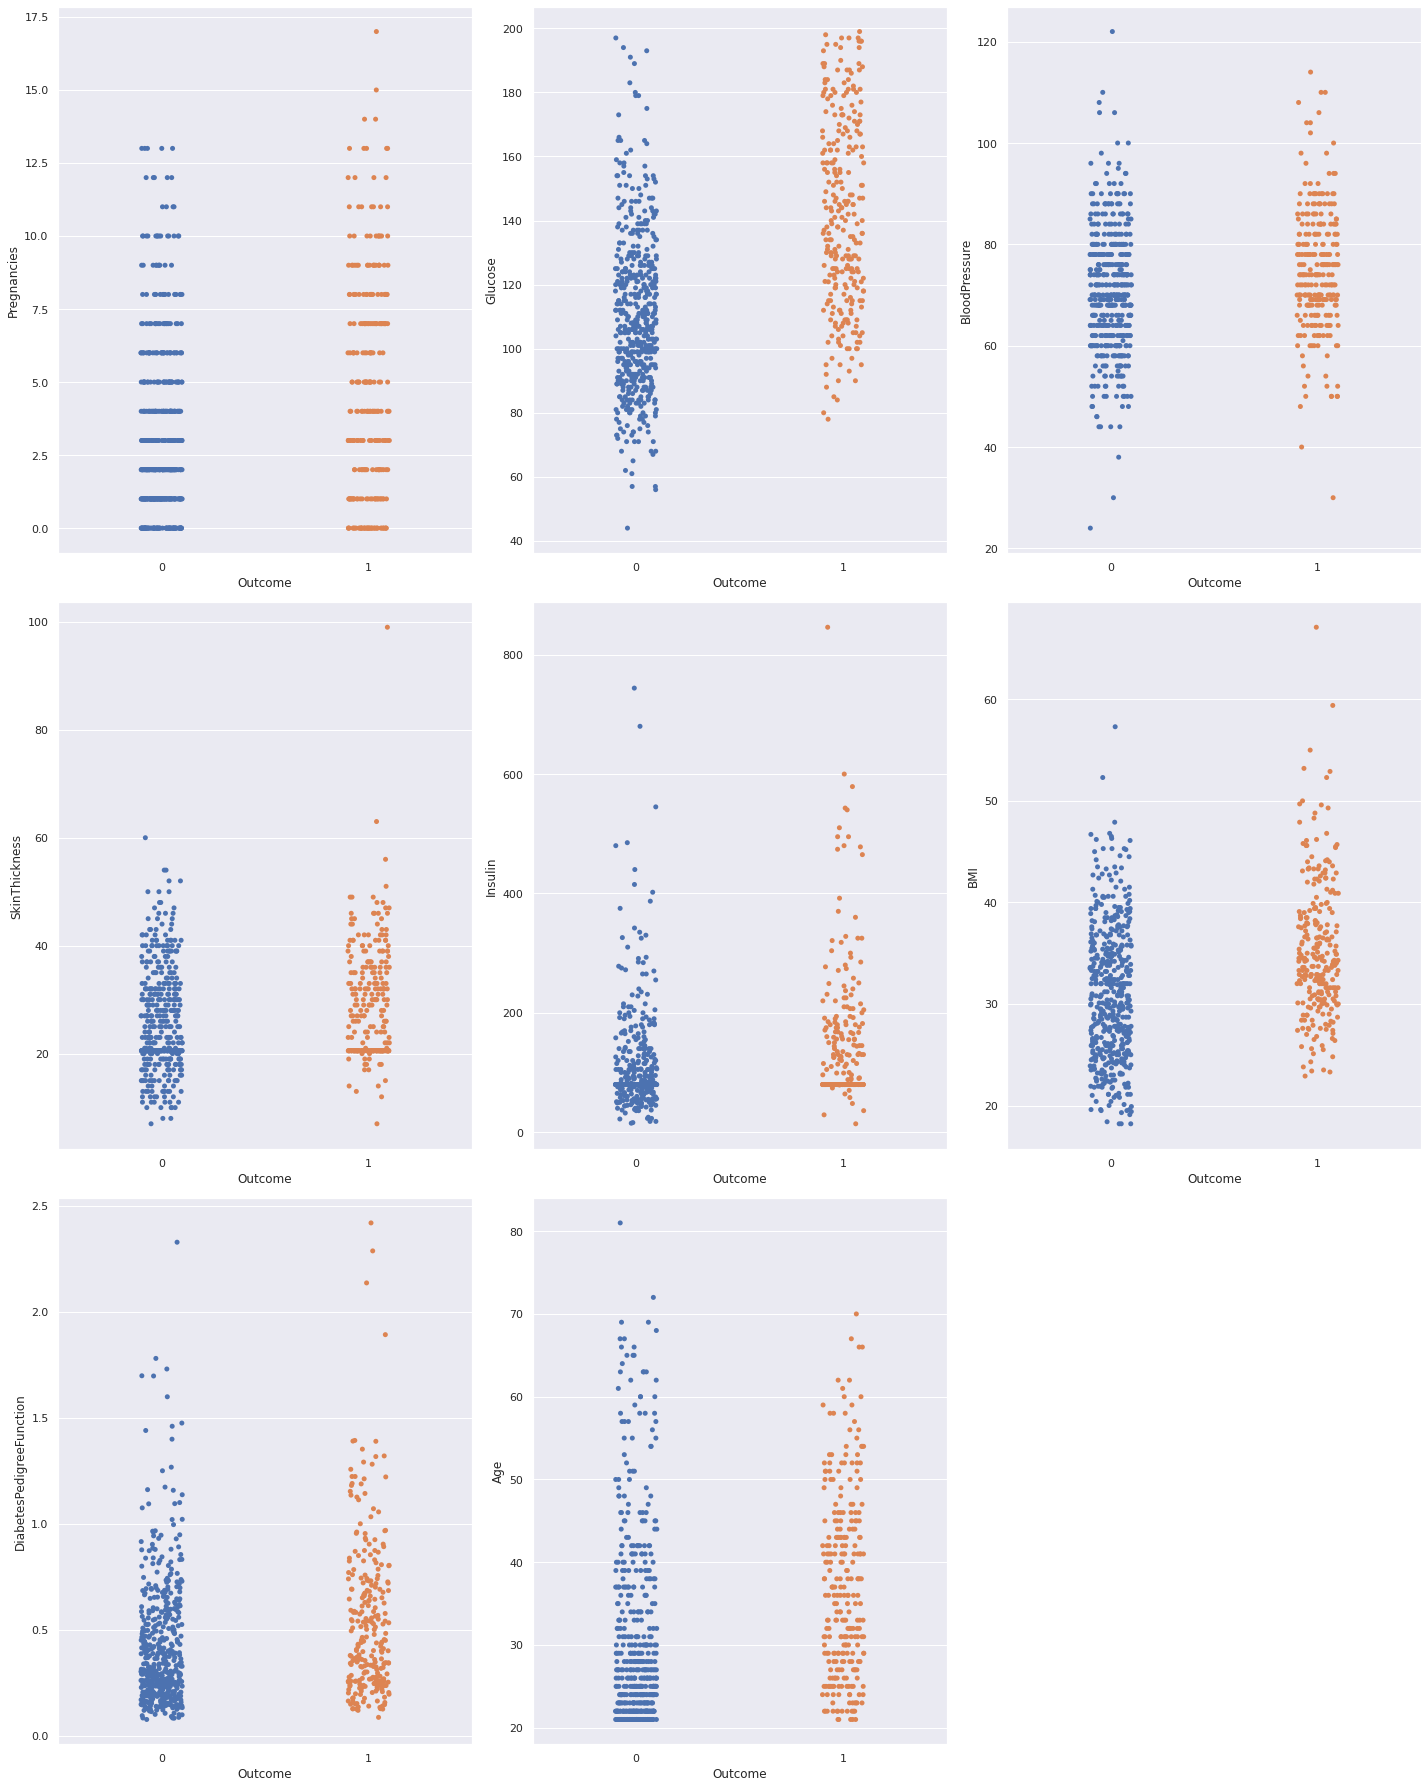

In [148]:
# Let's see how data is distributed for every column

plt.figure(figsize=(20,25), facecolor = "white")
plotnumber = 1

for column in x:
  if plotnumber<=9:
    ax = plt.subplot(3,3,plotnumber)
    sns.stripplot(y,x[column])
  plotnumber+=1
plt.tight_layout()

### **SCALING THE DATA**

In [149]:
from re import X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

* This is how our data looks now after scaling.
* Now we will check for multicollinerity using VIF(Variance Inflation Factor)

In [150]:
X_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

### **VARIANCE INFLATION FACTOR**

In [151]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = x.columns

# Let's check the values
vif

,vif,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


In [152]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state = 355)

### **FITTING THE MODEL**

In [153]:
log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)

LogisticRegression()

In [154]:
import pickle
# writing different model files to file

with open("modelForPrediction,sav","wb") as f:
  pickle.dump(log_reg,f)




In [155]:
y_pred = log_reg.predict(X_test)


### **ACCURACY**

In [156]:
accuracy = accuracy_score(y_test,y_pred)*100
accuracy

75.52083333333334

### **CONFUSION MATRIX**

In [157]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[110,  15],
       [ 32,  35]])

In [158]:
true_Positive = conf_mat[0][0]
false_Positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [159]:
# Breaking down the formula for accuracy

Accuracy = (true_Positive + true_negative) / (true_Positive + false_Positive + false_negative + true_negative)
Accuracy

0.7552083333333334

In [160]:
# Precision

precision = true_Positive/(true_Positive + false_Positive)
precision

0.88

In [161]:
# Recall

Recall = true_Positive / (true_Positive + false_Positive)
Recall

0.88

### **F1 SCORE**

In [162]:
# F1 Score

F1_Score = 2*(Recall * precision) /  (Recall + precision)
F1_Score

0.88

### **AUC ROC CURVE**

In [163]:
# Area Under Curve

auc = roc_auc_score(y_test,y_pred)

In [164]:
# ROC

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

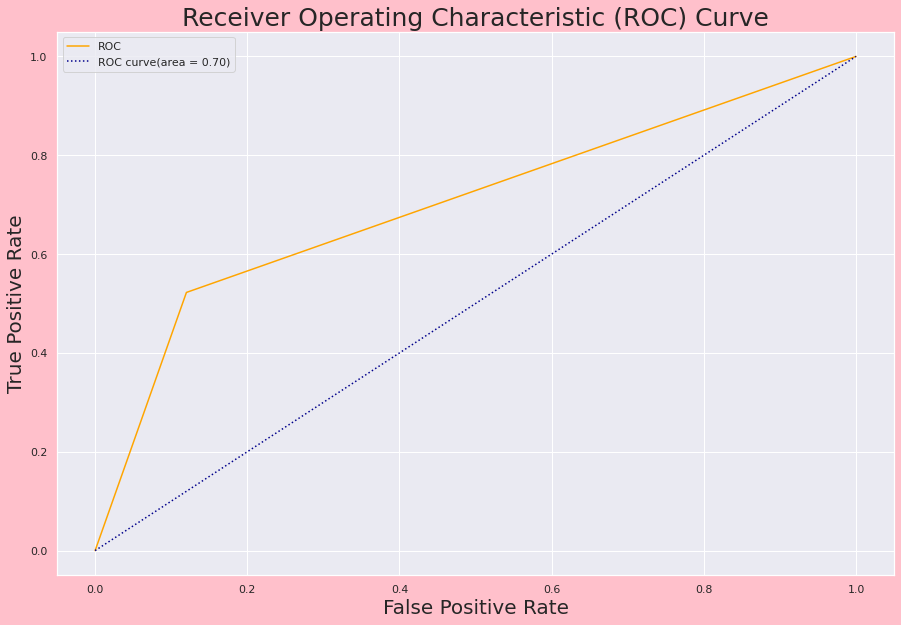

In [165]:
plt.figure(figsize=(15,10),facecolor="pink")
plt.plot(fpr, tpr, color="orange",label="ROC")
plt.plot([0,1],[0,1],color="darkblue",linestyle="dotted",label="ROC curve(area = %0.2f)" % auc)
plt.xlabel("False Positive Rate",fontsize=20)
plt.ylabel("True Positive Rate",fontsize=20)
plt.title("Receiver Operating Characteristic (ROC) Curve",fontsize=25)
plt.legend()
plt.show()

**What is the significance of ROC and AUC?**

* In real life, we ceate various models using different algorithms that we can use for classification purpose.
* We use ACU to determine which model is the best one to use for a given dataset.
* Suppose we have created Logistic Regression,SVM as well as a clustering model for classification purpose. We will caluclate AUC for all the models seperately.
* The model with highest ACU value will be the best model to use

**Advantages of Logistic Regression**
* It is very simple and easy to implement 
* The output is more informative than other classification algorithms
* It expresses the relationship between independent and dependent variables                          
* It is very effective with linearly seperable data

**Disadvantages of Logistic Regression**
* It is not effective with data which are not linearly seperable
* It is not as powerful as other clasification models
* Multiclass classifications are much easier to do with other algorithms than Logistic Regrression